In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


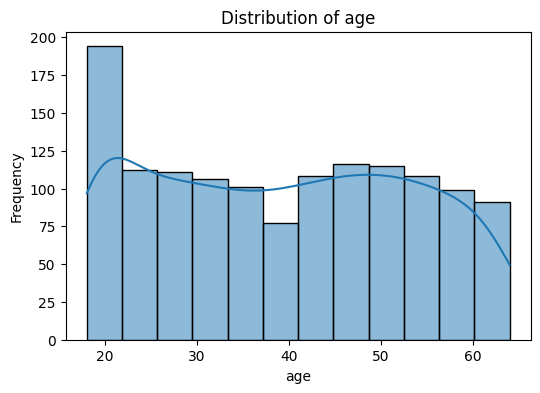

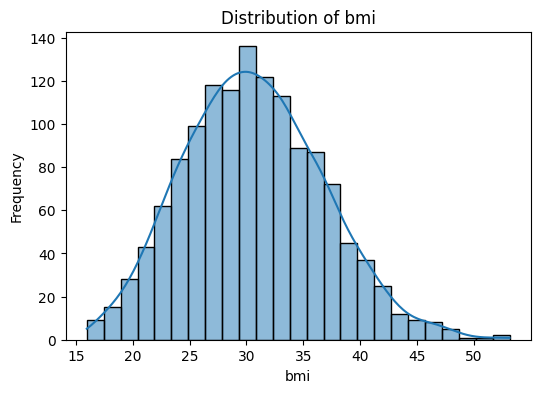

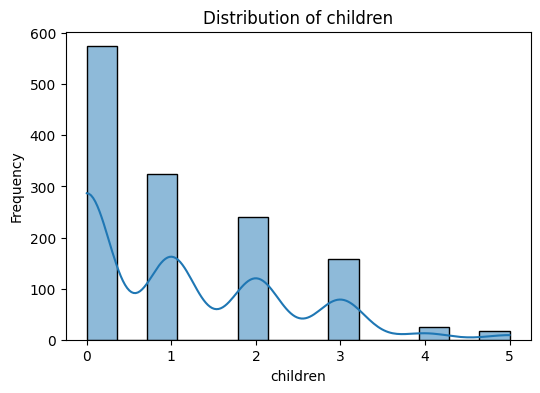

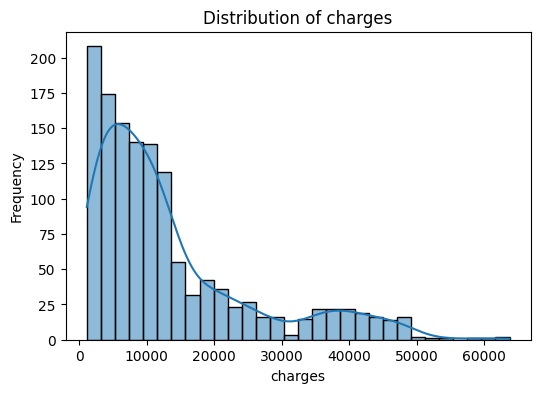

In [5]:
numeric_col = ['age',  'bmi', 'children',  'charges']
for col in numeric_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

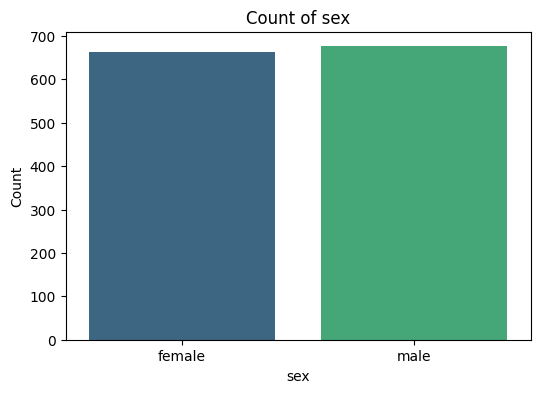

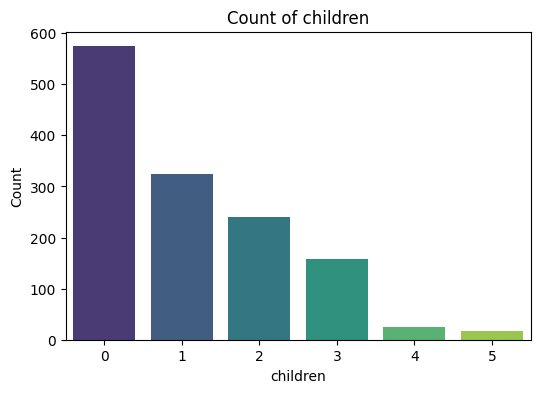

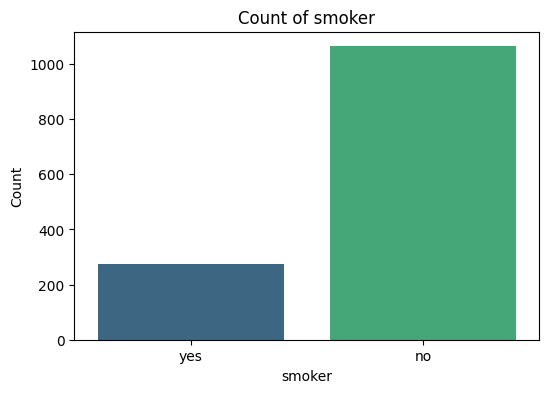

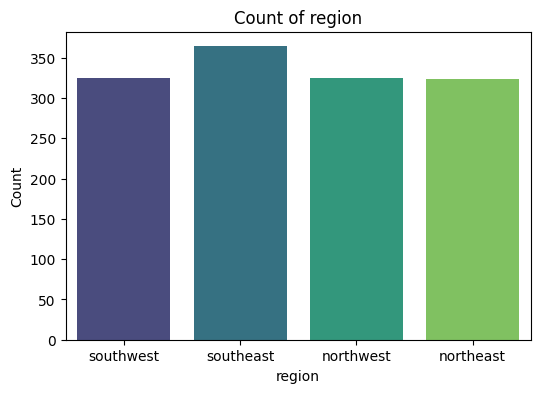

In [6]:
str_col = [ 'sex',"children",   'smoker', 'region']
for col in str_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

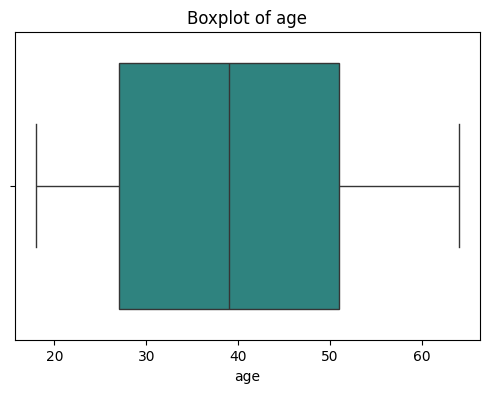

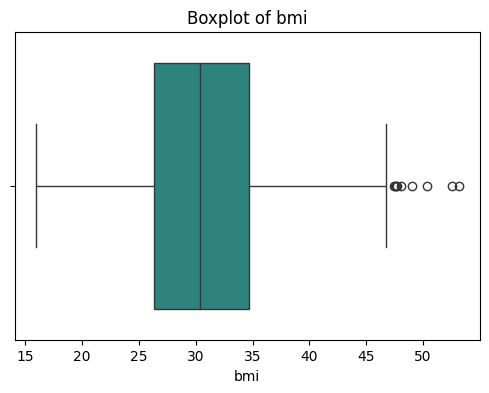

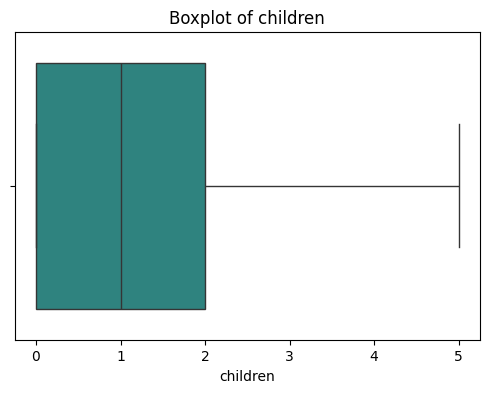

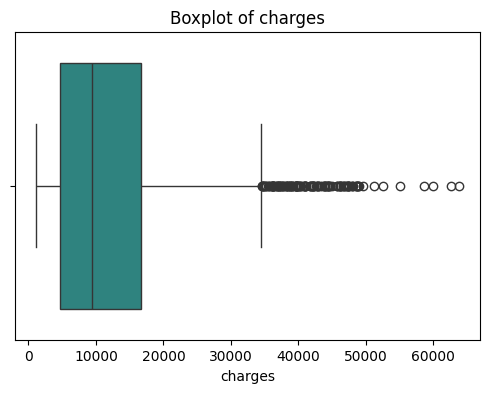

In [7]:
for col in numeric_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

<Axes: >

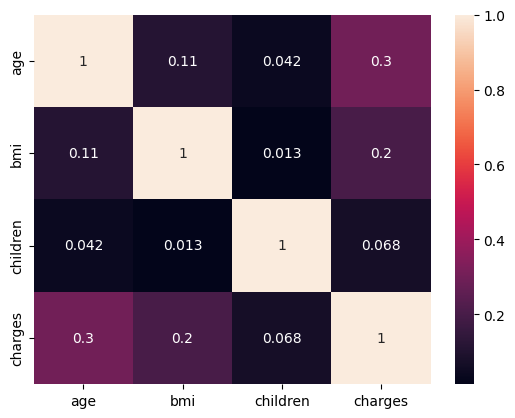

In [8]:
sns.heatmap(df.corr( numeric_only=True), annot=True)

In [9]:
#Data cleaning and processing
df_cleaned = df.copy()

In [10]:
df_cleaned.drop_duplicates(inplace=True)

In [11]:
df_cleaned.shape

(1337, 7)

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [13]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [14]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0, 'female': 1})

In [15]:
df_cleaned.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [16]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no': 0, 'yes': 1})

In [17]:
df_cleaned.rename(columns={'sex': 'is_female', 'smoker': "is_smoker"}, inplace=True)

In [18]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [19]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [21]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'], drop_first=True)

In [22]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


Feature Engineering and Extraction

In [24]:
df_cleaned["bmi_category"] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal weight', 'Overweight', 'Obseseity']
)



In [33]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal weight,bmi_category_Overweight,bmi_category_Obseseity
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [29]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'], drop_first=True)

In [32]:
df_cleaned = df_cleaned.astype(int)

In [34]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal weight', 'bmi_category_Overweight',
       'bmi_category_Obseseity'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler
cols  = ['age', 'bmi', 'children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [38]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal weight,bmi_category_Overweight,bmi_category_Obseseity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [40]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal weight', 'bmi_category_Overweight',
       'bmi_category_Obseseity'],
      dtype='object')

In [43]:
from scipy.stats import pearsonr

#Pearson correlation Calculation

selected_fea = ['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal weight', 'bmi_category_Overweight',
       'bmi_category_Obseseity']


correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_fea 
}


correlations_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Pearson Correlation'])
correlations_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
5,charges,1.000000
4,is_smoker,0.787234
0,age,0.298309
11,bmi_category_Obseseity,0.197660
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
6,region_northwest,-0.038695
8,region_southwest,-0.043637
1,is_female,-0.058046
